In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
data = pd.read_csv("/Users/tonytang/Downloads/socal2.csv")
data.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.3+ KB


In [4]:
data.describe()

,image_id,n_citi,bed,bath,sqft,price
count,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,1.547400e+04
mean,7736.500000,216.597518,3.506398,2.453251,2173.913209,7.031209e+05
std,4467.103368,112.372985,1.034838,0.958742,1025.339617,3.769762e+05
min,0.000000,0.000000,1.000000,0.000000,280.000000,1.950000e+05
25%,3868.250000,119.000000,3.000000,2.000000,1426.000000,4.450000e+05
50%,7736.500000,222.500000,3.000000,2.100000,1951.000000,6.390000e+05
75%,11604.750000,315.000000,4.000000,3.000000,2737.750000,8.349750e+05
max,15473.000000,414.000000,12.000000,36.000000,17667.000000,2.000000e+06


In [5]:
data.columns

Index(['image_id', 'street', 'citi', 'n_citi', 'bed', 'bath', 'sqft', 'price'], dtype='object')

In [6]:
data1 = data.drop(['image_id','street','n_citi'],axis='columns')

In [7]:
data1.head()

,citi,bed,bath,sqft,price
0,"Salton City, CA",3,2.0,1560,201900
1,"Brawley, CA",3,2.0,713,228500
2,"Imperial, CA",3,1.0,800,273950
3,"Brawley, CA",3,1.0,1082,350000
4,"Calexico, CA",4,3.0,2547,385100


In [8]:
data1.isnull().sum()

citi     0
bed      0
bath     0
sqft     0
price    0
dtype: int64

In [9]:
data2 = data1.dropna()
data2.isnull().sum()

citi     0
bed      0
bath     0
sqft     0
price    0
dtype: int64

In [10]:
data2['bath'].unique()

array([ 2. ,  1. ,  3. ,  2.1,  5.1,  3.1,  1.1,  2.2,  5. ,  4. ,  1.2,
        4.1,  8. ,  3.2,  6. ,  5.2,  6.1,  7. ,  2.3, 36. , 13. ,  3.3,
        4.2,  0. ,  2.4,  8.1,  6.2,  7.1,  5.3,  4.3, 11.2,  0.1])

In [11]:
data2['bath'] = data2['bath'].round().astype('int')

In [12]:
data2['bath'].unique()

array([ 2,  1,  3,  5,  4,  8,  6,  7, 36, 13,  0, 11])

In [13]:
data2['bed'].unique()

array([ 3,  4,  5,  2,  1,  8,  6, 10,  7,  9, 12, 11])

In [14]:
data2.shape

(15474, 5)

In [15]:
data2['price_per_sqft'] = np.round(data2['price']/data2['sqft'])
data2.head()

,citi,bed,bath,sqft,price,price_per_sqft
0,"Salton City, CA",3,2,1560,201900,129.0
1,"Brawley, CA",3,2,713,228500,320.0
2,"Imperial, CA",3,1,800,273950,342.0
3,"Brawley, CA",3,1,1082,350000,323.0
4,"Calexico, CA",4,3,2547,385100,151.0


In [16]:
location_stats=data2['citi'].value_counts(ascending=False)
location_stats

citi
San Diego, CA           707
Los Angeles, CA         388
Lancaster, CA           312
La Quinta, CA           305
Riverside, CA           274
                       ... 
Mt Baldy, CA              1
Echo Park, CA             1
Parkfield, CA             1
Val Verde, CA             1
Hawaiian Gardens, CA      1
Name: count, Length: 415, dtype: int64

In [17]:
location_stats.values.sum()

15474

In [18]:
len(location_stats[location_stats>10])

244

In [19]:
len(location_stats)

415

In [20]:
len(location_stats[location_stats<=10])

171

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

citi
Rancho Palos Verdes, CA    10
Sunland, CA                10
Boulevard, CA              10
Morongo Valley, CA         10
29 Palms, CA               10
                           ..
Mt Baldy, CA                1
Echo Park, CA               1
Parkfield, CA               1
Val Verde, CA               1
Hawaiian Gardens, CA        1
Name: count, Length: 171, dtype: int64

In [22]:
data2.citi = data2.citi.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data2.citi.unique())

245

In [23]:
data2.head()

,citi,bed,bath,sqft,price,price_per_sqft
0,other,3,2,1560,201900,129.0
1,other,3,2,713,228500,320.0
2,other,3,1,800,273950,342.0
3,other,3,1,1082,350000,323.0
4,other,4,3,2547,385100,151.0


In [24]:
data2['citi'].value_counts(ascending=False)

citi
other                755
San Diego, CA        707
Los Angeles, CA      388
Lancaster, CA        312
La Quinta, CA        305
                    ... 
Santa Barbara, CA     11
Temple City, CA       11
Claremont, CA         11
Alhambra, CA          11
Del Mar, CA           11
Name: count, Length: 245, dtype: int64

In [25]:
data2[data2['sqft']/data2['bed']<300].head()

,citi,bed,bath,sqft,price,price_per_sqft
1,other,3,2,713,228500,320.0
2,other,3,1,800,273950,342.0
631,"Lancaster, CA",4,2,1178,249000,211.0
638,"Palmdale, CA",4,1,1156,239900,208.0
653,"Lancaster, CA",4,2,1170,215000,184.0


In [26]:
len(data2[data2['sqft']/data2['bed']<300])

156

In [27]:
data2.shape

(15474, 6)

In [28]:
data3=data2[~(data2['sqft']/data2['bed']<300)]

In [29]:
data3.shape

(15318, 6)

In [30]:
data3.head()

,citi,bed,bath,sqft,price,price_per_sqft
0,other,3,2,1560,201900,129.0
3,other,3,1,1082,350000,323.0
4,other,4,3,2547,385100,151.0
5,other,3,1,1082,350000,323.0
6,other,4,3,2769,415000,150.0


In [31]:
data3['price_per_sqft'].describe()

count    15318.000000
mean       348.466118
std        179.514366
min         43.000000
25%        229.000000
50%        314.000000
75%        421.000000
max       3627.000000
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('citi'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data4 = remove_pps_outliers(data3)
data4.shape

(11962, 6)

In [33]:
data4.head()

,citi,bed,bath,sqft,price,price_per_sqft
0,"Acton, CA",3,2,1440,249000,173.0
1,"Acton, CA",3,2,1440,249000,173.0
2,"Acton, CA",4,2,1536,439000,286.0
3,"Acton, CA",3,2,1816,499900,275.0
4,"Acton, CA",4,2,1571,499000,318.0


In [34]:
data4['price_per_sqft'].describe()

count    11962.000000
mean       326.005016
std        128.171694
min         68.000000
25%        228.000000
50%        306.000000
75%        400.750000
max       1261.000000
Name: price_per_sqft, dtype: float64

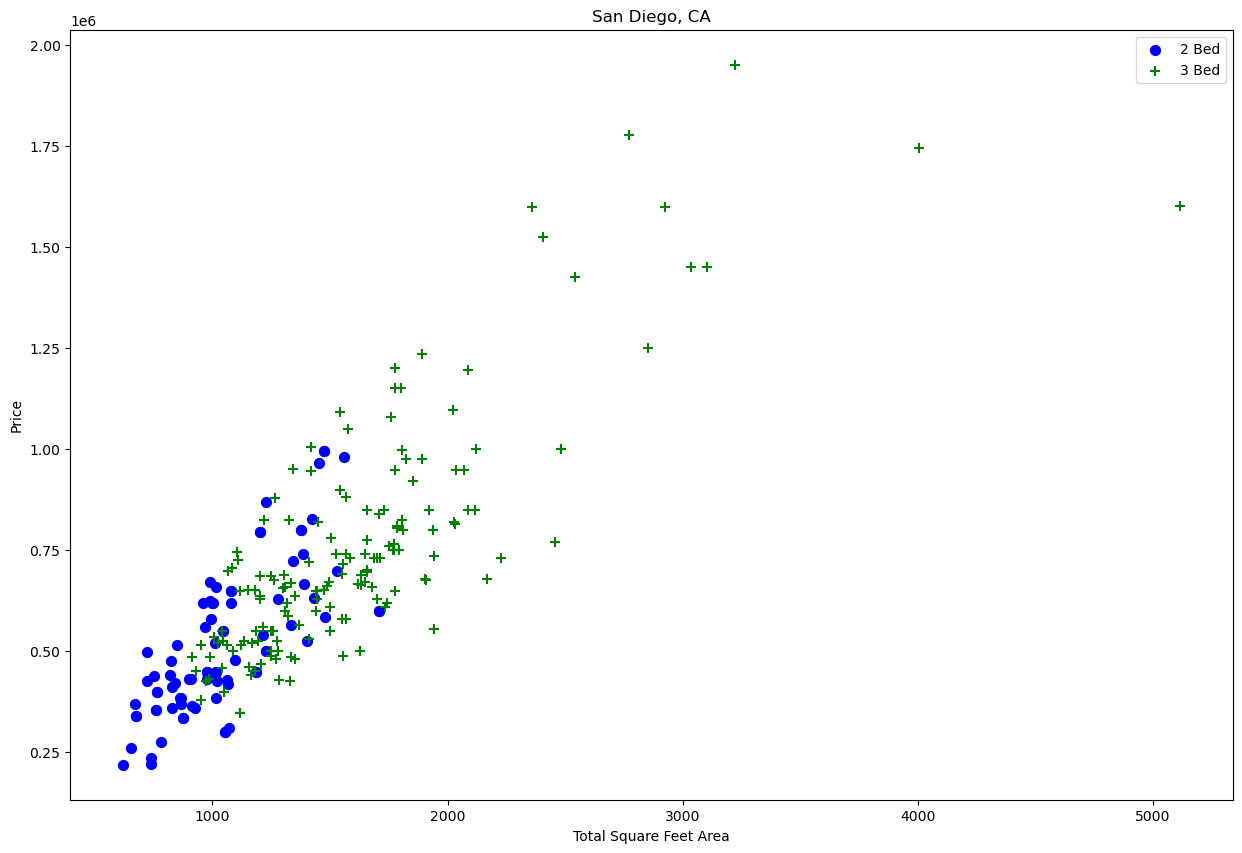

In [35]:
def plot_scatter_chart(df,city):
    bb2 = df[(df.citi==city) & (df.bed==2)]
    bb3 = df[(df.citi==city) & (df.bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bb2['sqft'],bb2['price'],color='blue',label='2 Bed', s=50)
    plt.scatter(bb3['sqft'],bb3['price'],marker='+', color='green',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(city)
    plt.legend()
    
plot_scatter_chart(data4,"San Diego, CA")

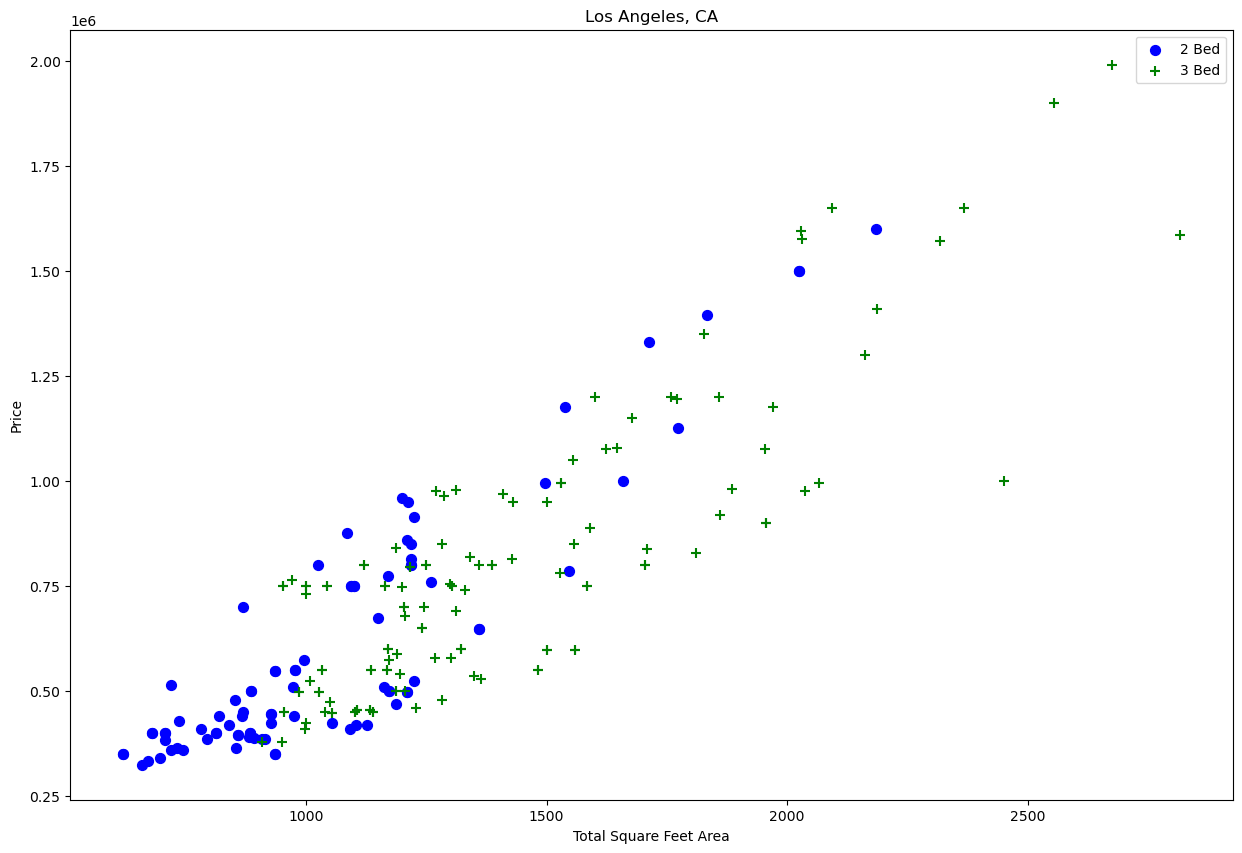

In [36]:
plot_scatter_chart(data4,"Los Angeles, CA")

In [52]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('citi'):
        bed_stats = {}
        
        for bed, bed_df in location_df.groupby('bed'):
            if bed_df.shape[0] >= 5:
                Q1 = np.percentile(bed_df.price_per_sqft, 25)
                Q3 = np.percentile(bed_df.price_per_sqft, 75)
                IQR = Q3 - Q1
                
                bed_stats[bed] = {
                    'mean': np.mean(bed_df.price_per_sqft),
                    'std': np.std(bed_df.price_per_sqft),
                    'count': bed_df.shape[0],
                    'Q1': Q1,
                    'Q3': Q3,
                    'IQR': IQR
                }
                
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = bed_df[(bed_df.price_per_sqft < lower_bound) | 
                                 (bed_df.price_per_sqft > upper_bound)]
                exclude_indices = np.append(exclude_indices, outliers.index.values)
        
        for bed, bed_df in location_df.groupby('bed'):
            if bed >= 3:
                stats = bed_stats.get(bed-1)
                if stats and stats['count'] > 5:
                    threshold = stats['mean'] * 0.85
                    
                    low_price_outliers = bed_df[bed_df.price_per_sqft < threshold]
                    exclude_indices = np.append(exclude_indices, low_price_outliers.index.values)
    
    unique_indices = np.unique(exclude_indices)

    return df.drop(unique_indices, axis='index')
data5 = remove_bed_outliers(data4)
data5.shape

(9564, 6)

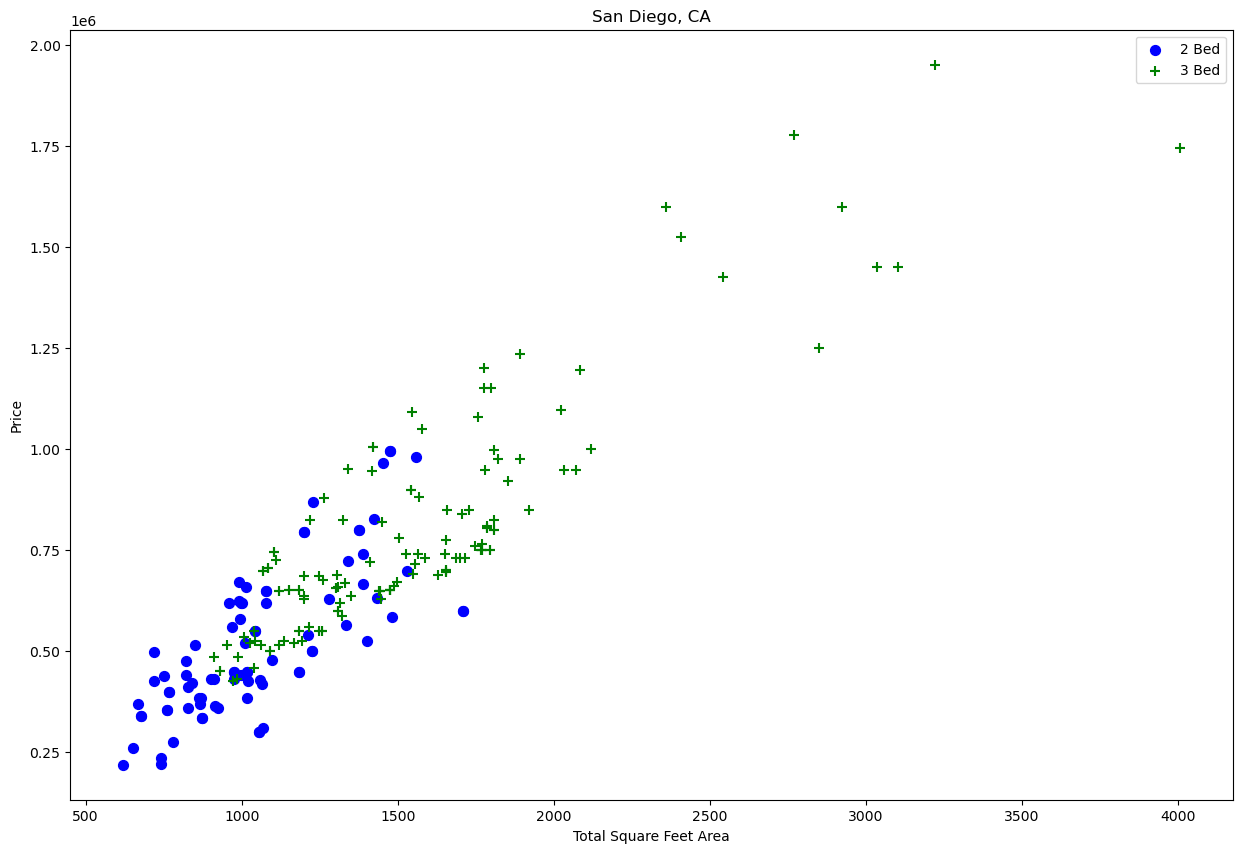

In [54]:
plot_scatter_chart(data5,"San Diego, CA")

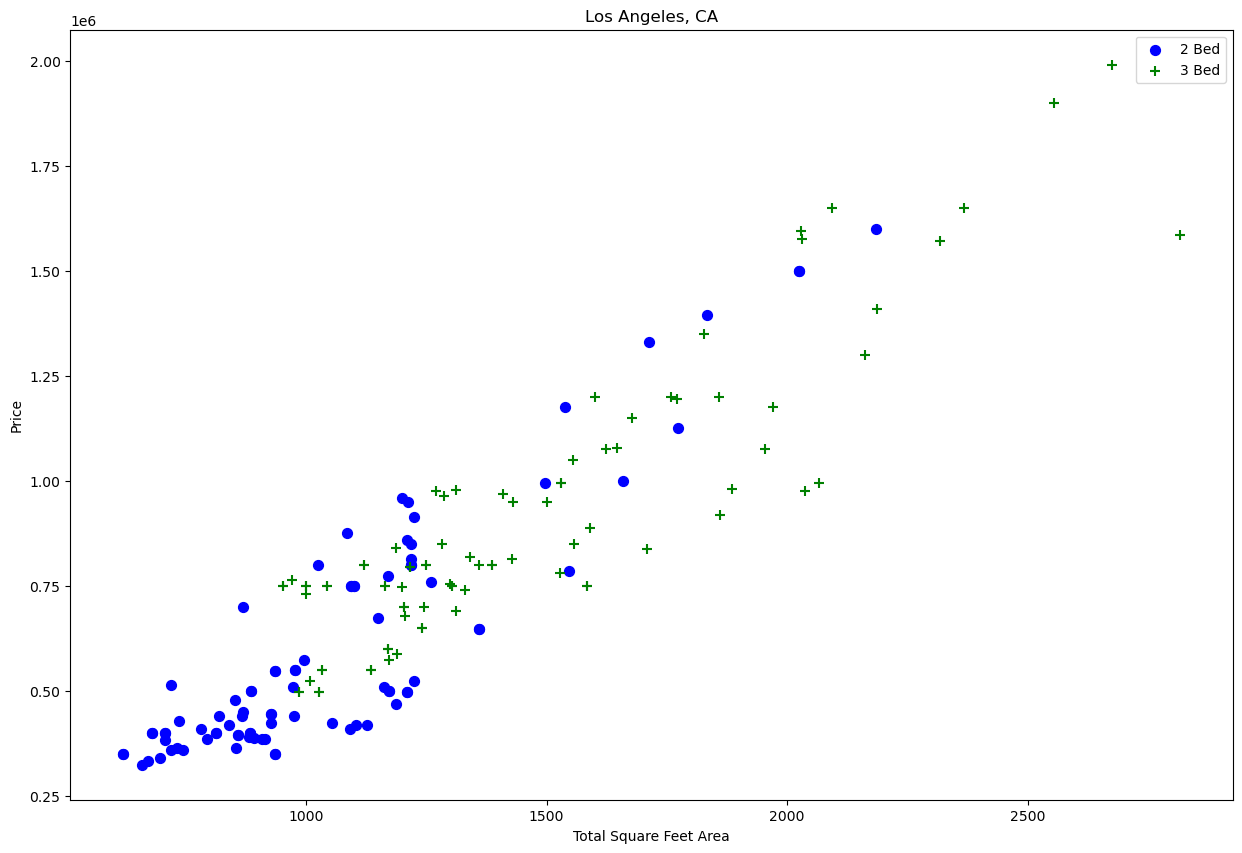

In [55]:
plot_scatter_chart(data5,"Los Angeles, CA")

Text(0, 0.5, 'Count')

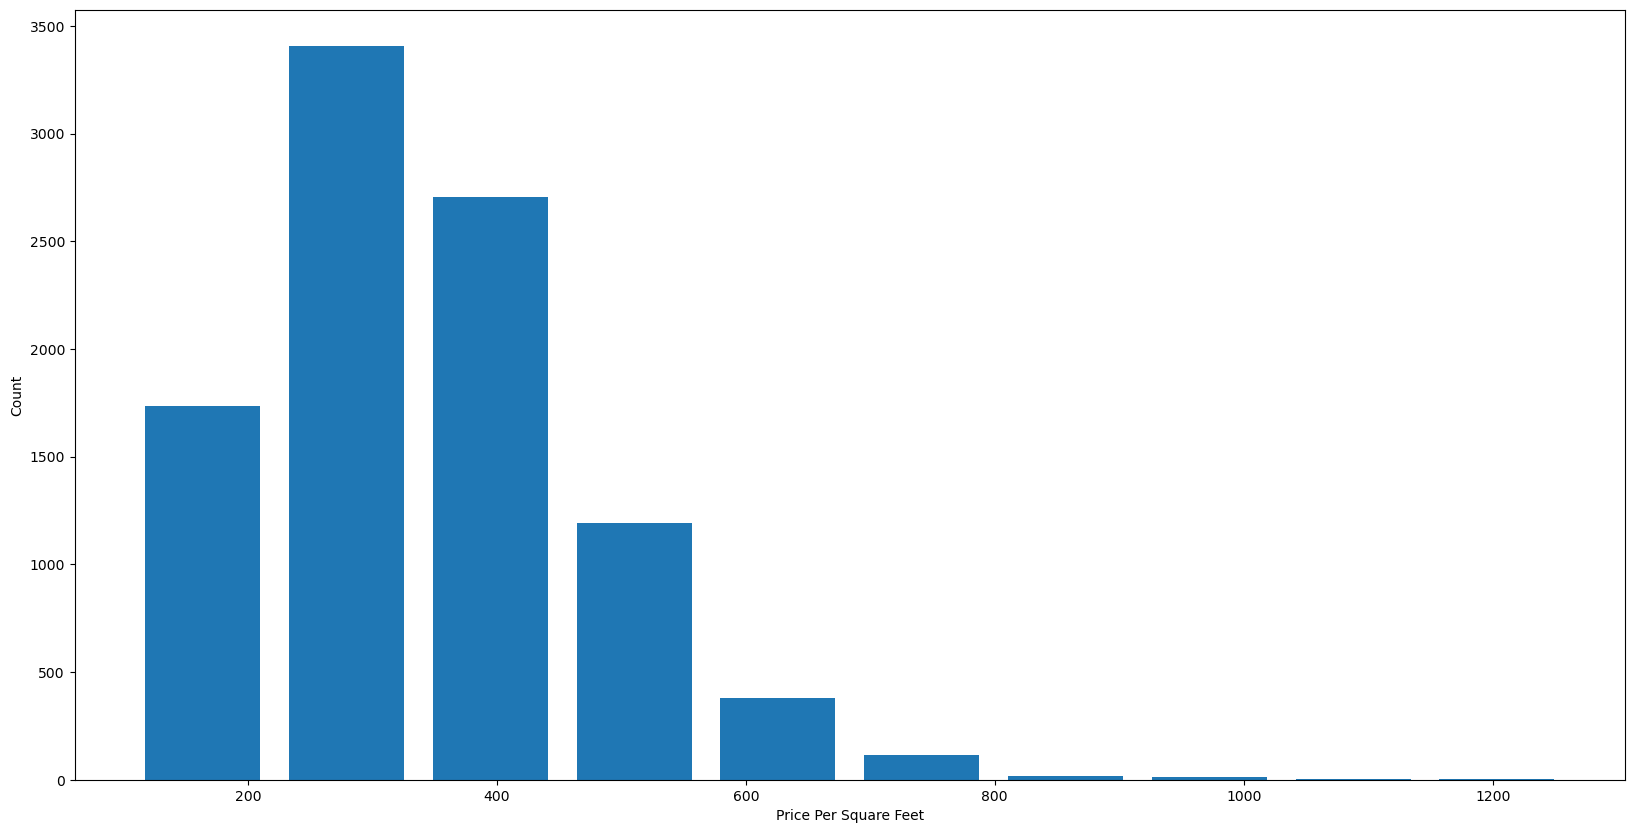

In [56]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [57]:
data5.bath.unique()

array([ 2,  1,  3,  5,  4,  6,  8,  7, 36,  0])

Text(0, 0.5, 'Count')

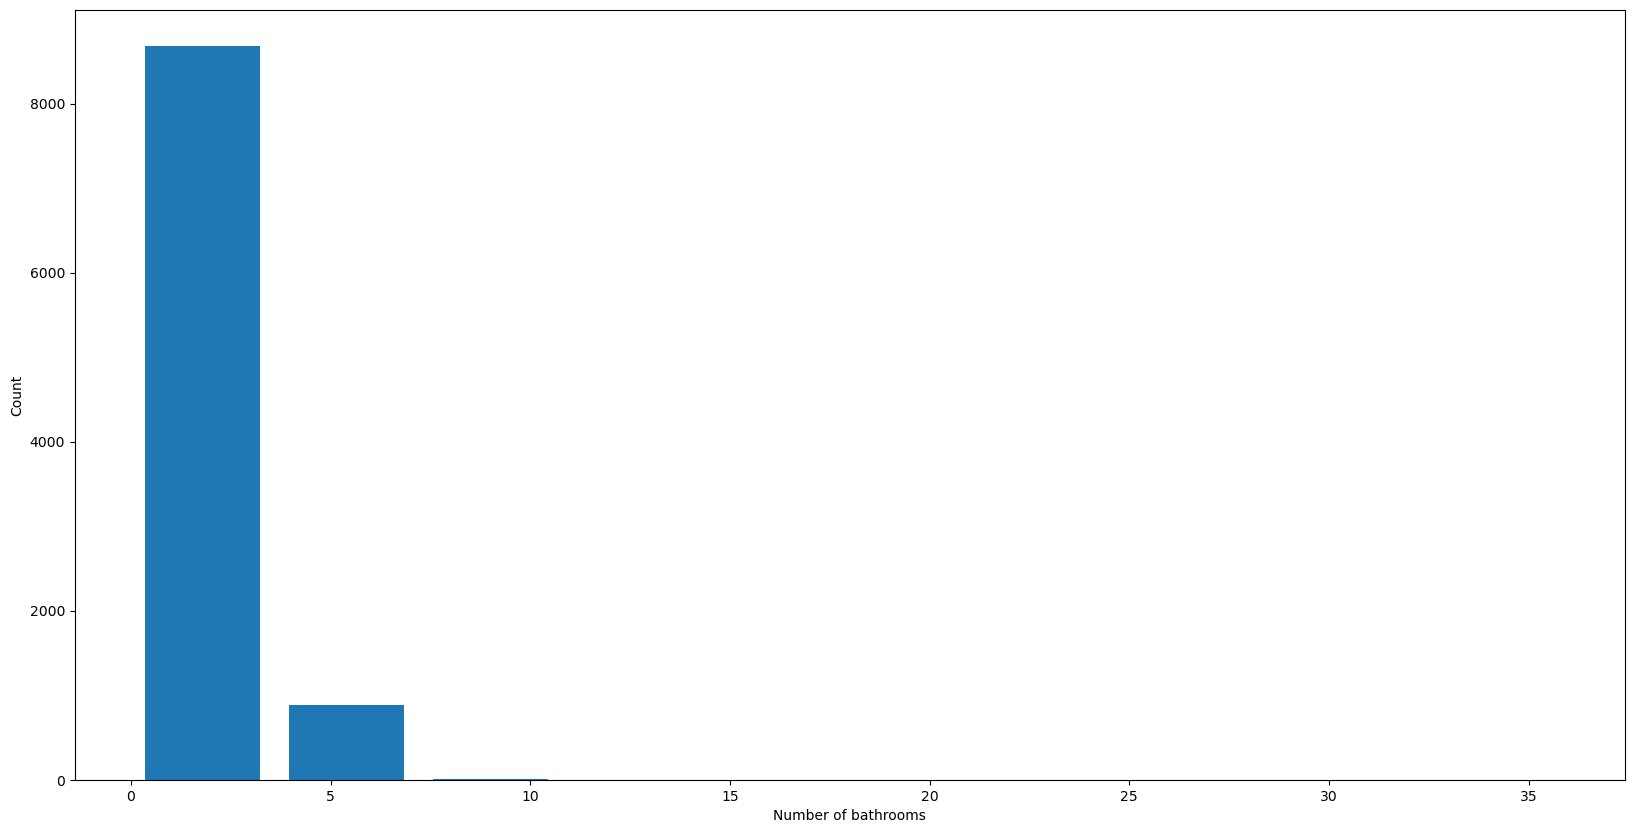

In [58]:
plt.hist(data5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [59]:
data5[(data5.bath > 6) | (data5.bath < 1)]

,citi,bed,bath,sqft,price,price_per_sqft
551,"Bakersfield, CA",10,8,3784,475000,126.0
701,"Big Bear, CA",7,7,6860,1350000,197.0
3317,"Hesperia, CA",9,8,17667,1999888,113.0
3825,"La Habra Heights, CA",5,7,4751,1990000,419.0
4712,"Lancaster, CA",4,36,1229,240000,195.0
7940,"Rancho Mirage, CA",4,7,6462,1995000,309.0
8119,"Redlands, CA",3,0,1648,450000,273.0
8123,"Redlands, CA",3,0,1648,450000,273.0
9767,"Santa Paula, CA",3,0,2625,840000,320.0
9768,"Santa Paula, CA",3,0,2924,825000,282.0


In [60]:
data5.shape

(9564, 6)

In [61]:
data6 = data5[(data5.bath <= 6) & (data5.bath >= 1)]

In [62]:
data6.shape

(9548, 6)

In [63]:
data6[(data6.bath > data6.bed+2)]

,citi,bed,bath,sqft,price,price_per_sqft


In [64]:
data7 = data6[~(data6.bath > data6.bed+2)]

In [65]:
data7.shape

(9548, 6)

In [66]:
data7.head()

,citi,bed,bath,sqft,price,price_per_sqft
0,"Acton, CA",3,2,1440,249000,173.0
1,"Acton, CA",3,2,1440,249000,173.0
2,"Acton, CA",4,2,1536,439000,286.0
3,"Acton, CA",3,2,1816,499900,275.0
4,"Acton, CA",4,2,1571,499000,318.0


In [67]:
data8 = data7.drop(['price_per_sqft'],axis='columns')
data8.head()

,citi,bed,bath,sqft,price
0,"Acton, CA",3,2,1440,249000
1,"Acton, CA",3,2,1440,249000
2,"Acton, CA",4,2,1536,439000
3,"Acton, CA",3,2,1816,499900
4,"Acton, CA",4,2,1571,499000


In [68]:
dummies = pd.get_dummies(data8['citi'], dtype=int)
dummies.head()

,"Acton, CA","Adelanto, CA","Agoura Hills, CA","Alhambra, CA","Aliso Viejo, CA","Alpine, CA","Alta Loma, CA","Altadena, CA","Anaheim Hills, CA","Anaheim, CA",...,"Whittier, CA","Wildomar, CA","Winchester, CA","Winnetka, CA","Woodland Hills, CA","Wrightwood, CA","Yorba Linda, CA","Yucaipa, CA","Yucca Valley, CA",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
data9 = pd.concat([data8,dummies.drop('other',axis='columns')],axis='columns')
data9.head()

,citi,bed,bath,sqft,price,"Acton, CA","Adelanto, CA","Agoura Hills, CA","Alhambra, CA","Aliso Viejo, CA",...,"Westminster, CA","Whittier, CA","Wildomar, CA","Winchester, CA","Winnetka, CA","Woodland Hills, CA","Wrightwood, CA","Yorba Linda, CA","Yucaipa, CA","Yucca Valley, CA"
0,"Acton, CA",3,2,1440,249000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Acton, CA",3,2,1440,249000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Acton, CA",4,2,1536,439000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Acton, CA",3,2,1816,499900,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Acton, CA",4,2,1571,499000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data10=data9.drop('citi',axis='columns')
data10.head()

,bed,bath,sqft,price,"Acton, CA","Adelanto, CA","Agoura Hills, CA","Alhambra, CA","Aliso Viejo, CA","Alpine, CA",...,"Westminster, CA","Whittier, CA","Wildomar, CA","Winchester, CA","Winnetka, CA","Woodland Hills, CA","Wrightwood, CA","Yorba Linda, CA","Yucaipa, CA","Yucca Valley, CA"
0,3,2,1440,249000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,1440,249000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2,1536,439000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,1816,499900,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,1571,499000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data10.shape

(9548, 248)

In [72]:
X = data10.drop(['price'],axis='columns')
X.head(3)

,bed,bath,sqft,"Acton, CA","Adelanto, CA","Agoura Hills, CA","Alhambra, CA","Aliso Viejo, CA","Alpine, CA","Alta Loma, CA",...,"Westminster, CA","Whittier, CA","Wildomar, CA","Winchester, CA","Winnetka, CA","Woodland Hills, CA","Wrightwood, CA","Yorba Linda, CA","Yucaipa, CA","Yucca Valley, CA"
0,3,2,1440,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,1440,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2,1536,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X.shape

(9548, 247)

In [74]:
y = data10.price
y.head(3)

0    249000
1    249000
2    439000
Name: price, dtype: int64

In [75]:
len(y)

9548

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8534230175086559

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84725463, 0.86242335, 0.85867925, 0.85929625, 0.8544423 ])

In [79]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'sgd_regressor': {
            'model': SGDRegressor(),
            'params': {
                'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
                'penalty': ['l2', 'l1', 'elasticnet'],
                'alpha': [0.0001, 0.001, 0.01, 0.1],
                'learning_rate': ['constant', 'optimal', 'adaptive'],
                'eta0': [0.01, 0.1, 0.5],  
                'max_iter': [1000, 2000]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.856419,{'fit_intercept': True}
1,sgd_regressor,0.484355,"{'alpha': 0.001, 'eta0': 0.5, 'learning_rate':..."
2,decision_tree,0.740268,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [80]:
def predict_price(location, bed, bath, sqft):
    input_df = pd.DataFrame(columns=X.columns)
    
    input_df.loc[0] = 0
    
    input_df.loc[0, 'bed'] = bed
    input_df.loc[0, 'bath'] = bath
    input_df.loc[0, 'sqft'] = sqft
    
    if location in X.columns:
        input_df.loc[0, location] = 1
    
    return lr_clf.predict(input_df)[0]

In [81]:
predict_price('Acton, CA', 3, 2, 1440)

424477.2808516148

In [82]:
predict_price('San Diego, CA', 4, 2, 2436)

1061750.5248543199

In [83]:
predict_price('Los Angeles, CA', 3, 2, 1970)

989738.3401990063

In [84]:
import pickle
with open('socal_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [118]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))